# import required package

In [1]:
# import required package

import cv2
import pandas as pd
import matplotlib.pyplot as plt

# read csv file

In [2]:
# read csv file

color_data = pd.read_csv('colors.csv')
color_data

,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
0,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
1,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
2,alabama_crimson,Alabama Crimson,#a32638,163,38,56
3,alice_blue,Alice Blue,#f0f8ff,240,248,255
4,alizarin_crimson,Alizarin Crimson,#e32636,227,38,54
...,...,...,...,...,...,...
859,yellow_orange,Yellow Orange,#ffae42,255,174,66
860,yellow_process,Yellow (Process),#ffef00,255,239,0
861,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
862,zaffre,Zaffre,#0014a8,0,20,168


# Change the index names

In [3]:
# Change the index names

index = ['Color', 'Color_Name', 'Hex', 'R', 'G', 'B']
color_data = pd.read_csv('colors.csv', names=index)
color_data

,Color,Color_Name,Hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


In [4]:
color_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Color       865 non-null    object
 1   Color_Name  865 non-null    object
 2   Hex         865 non-null    object
 3   R           865 non-null    int64 
 4   G           865 non-null    int64 
 5   B           865 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 40.7+ KB


# load the image

In [5]:
# load the images

image = cv2.imread('colorpic.jpg')

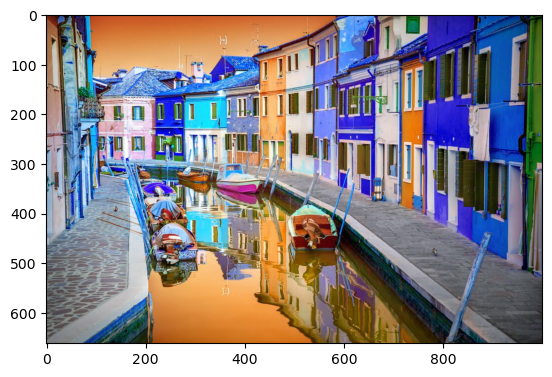

In [6]:
plt.imshow(image)

In [7]:
clicked = False
r = g = b = x_pos = y_pos = 0

# Calculate distance to get color name

In [8]:
# Calculate distance to get color name

def get_color_name(R,G,B):
    minimum = 1000
    for i in range(len(color_data)):
        distance = abs(R - int(color_data.loc[i, 'R'])) + abs(G - int(color_data.loc[i, 'G'])) + abs(B - int(color_data.loc[i, 'B']))
        
        if distance <= minimum:
            minimum = distance
            color_name = color_data.loc[i, 'Color_Name']
#     print(color_name)
    return color_name
# get_color_name(R, G, B)

# Create the draw function

In [9]:
# Create the draw_function

def draw_function(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        
        b, g, r = image[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

# Set a mouse callback event on a window

In [10]:
# Set a mouse callback event on a window

cv2.namedWindow('Image Color Detection')
cv2.setMouseCallback('Image Color Detection', draw_function)

QObject::moveToThread: Current thread (0x2b3ab20) is not the object's thread (0x2e10740).
Cannot move to target thread (0x2b3ab20)

QObject::moveToThread: Current thread (0x2b3ab20) is not the object's thread (0x2e10740).
Cannot move to target thread (0x2b3ab20)

QObject::moveToThread: Current thread (0x2b3ab20) is not the object's thread (0x2e10740).
Cannot move to target thread (0x2b3ab20)

QObject::moveToThread: Current thread (0x2b3ab20) is not the object's thread (0x2e10740).
Cannot move to target thread (0x2b3ab20)

QObject::moveToThread: Current thread (0x2b3ab20) is not the object's thread (0x2e10740).
Cannot move to target thread (0x2b3ab20)

QObject::moveToThread: Current thread (0x2b3ab20) is not the object's thread (0x2e10740).
Cannot move to target thread (0x2b3ab20)

QObject::moveToThread: Current thread (0x2b3ab20) is not the object's thread (0x2e10740).
Cannot move to target thread (0x2b3ab20)

QObject::moveToThread: Current thread (0x2b3ab20) is not the object's thread

# Display image on the window

In [ ]:
# Display image on the window

while(1):
    cv2.imshow("Image Color Detection", image)
    if clicked:
        cv2.rectangle(image, (30,600), (950,640), (b,g,r), -1)
        text = get_color_name(r,g,b) + ' ==> R='+ str(r) + ' G='+ str(g) + ' B='+ str(b)
        cv2.putText(image, text, (50,630), 2, 1, (255,255,255), 2, cv2.LINE_AA)
  
        if r+g+b >= 620:
            cv2.putText(image, text, (50,630), 2, 1, (0,0,0), 2, cv2.LINE_AA)
            
            clicked=False
            
    if cv2.waitKey(15) & 0xFF == 20:
        break
        
cv2.destroyAllWindows()